In [ ]:
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from joblib import dump, load


In [ ]:
df = pd.read_csv("./data/Exflows_team79.csv")



pd.set_option("display.max_rows", None)


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208268 entries, 0 to 208267
Data columns (total 24 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   flowStartSeconds                     208268 non-null  int64  
 1   sourceIPAddress                      208268 non-null  object 
 2   distinct(destinationIPAddress)       208268 non-null  int64  
 3   mode(destinationIPAddress)           208268 non-null  object 
 4   modeCount(destinationIPAddress)      208268 non-null  int64  
 5   distinct(sourceTransportPort)        208268 non-null  int64  
 6   mode(sourceTransportPort)            208235 non-null  float64
 7   modeCount(sourceTransportPort)       208235 non-null  float64
 8   distinct(destinationTransportPort)   208268 non-null  int64  
 9   mode(destinationTransportPort)       208235 non-null  float64
 10  modeCount(destinationTransportPort)  208235 non-null  float64
 11  distinct(prot

In [47]:
print(df.columns)

columns = ['flowStartSeconds',
       'distinct(sourceTransportPort)', 'mode(sourceTransportPort)',
       'modeCount(sourceTransportPort)', 'distinct(destinationTransportPort)',
       'mode(destinationTransportPort)', 'modeCount(destinationTransportPort)',
       'distinct(protocolIdentifier)', 'mode(protocolIdentifier)',
       'modeCount(protocolIdentifier)', 'distinct(ipTTL)', 'mode(ipTTL)',
       'modeCount(ipTTL)', 'distinct(_tcpFlags)', 'mode(_tcpFlags)',
       'modeCount(_tcpFlags)', 'distinct(octetTotalCount)',
       'mode(octetTotalCount)', 'modeCount(octetTotalCount)',
       'packetTotalCount']


Index(['flowStartSeconds', 'sourceIPAddress', 'distinct(destinationIPAddress)',
       'mode(destinationIPAddress)', 'modeCount(destinationIPAddress)',
       'distinct(sourceTransportPort)', 'mode(sourceTransportPort)',
       'modeCount(sourceTransportPort)', 'distinct(destinationTransportPort)',
       'mode(destinationTransportPort)', 'modeCount(destinationTransportPort)',
       'distinct(protocolIdentifier)', 'mode(protocolIdentifier)',
       'modeCount(protocolIdentifier)', 'distinct(ipTTL)', 'mode(ipTTL)',
       'modeCount(ipTTL)', 'distinct(_tcpFlags)', 'mode(_tcpFlags)',
       'modeCount(_tcpFlags)', 'distinct(octetTotalCount)',
       'mode(octetTotalCount)', 'modeCount(octetTotalCount)',
       'packetTotalCount'],
      dtype='object')


In [48]:
print(columns)

['flowStartSeconds', 'distinct(sourceTransportPort)', 'mode(sourceTransportPort)', 'modeCount(sourceTransportPort)', 'distinct(destinationTransportPort)', 'mode(destinationTransportPort)', 'modeCount(destinationTransportPort)', 'distinct(protocolIdentifier)', 'mode(protocolIdentifier)', 'modeCount(protocolIdentifier)', 'distinct(ipTTL)', 'mode(ipTTL)', 'modeCount(ipTTL)', 'distinct(_tcpFlags)', 'mode(_tcpFlags)', 'modeCount(_tcpFlags)', 'distinct(octetTotalCount)', 'mode(octetTotalCount)', 'modeCount(octetTotalCount)', 'packetTotalCount']


In [49]:
df = df.drop(labels=None, axis=1, columns=columns)


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208268 entries, 0 to 208267
Data columns (total 4 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   sourceIPAddress                  208268 non-null  object
 1   distinct(destinationIPAddress)   208268 non-null  int64 
 2   mode(destinationIPAddress)       208268 non-null  object
 3   modeCount(destinationIPAddress)  208268 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 6.4+ MB


In [51]:
df.head(5)

,sourceIPAddress,distinct(destinationIPAddress),mode(destinationIPAddress),modeCount(destinationIPAddress)
0,1.95.231.120,1,203.74.52.109,1
1,108.113.157.98,1,203.74.52.109,1
2,84.52.85.74,1,203.74.52.109,1
3,60.215.126.250,1,202.6.244.134,1
4,104.12.139.232,1,203.74.52.109,1


In [64]:


# 2) for each source IP, get its 'distinct(destinationIPAddress)' value
#    (this is already one row per flow, keyed by sourceIPAddress)
#    so we can directly count how many flows have exactly 1 dest, >10 dest
total_sources = len(df)

# But if the CSV already has one row per source IP (as AGM defines one vector per source),
# you can just do:
dest_counts = df["distinct(destinationIPAddress)"]




In [65]:
print(total_sources)

208268


In [1]:
# (a) fraction with exactly one destination
num_one = (dest_counts == 1).sum()

# (b) fraction with more than ten destinations
num_gt10 = (dest_counts > 10).sum()

# 3) compute percentages
pct_one = 100 * num_one / total_sources
pct_gt10 = 100 * num_gt10 / total_sources

# 4) round to one decimal
rep_13a = round(pct_one, 1)
rep_13b = round(pct_gt10, 1)

print(f'rep-13a: {rep_13a}%')
print(f'rep-13b: {rep_13b}%')

NameError: name 'dest_counts' is not defined

In [ ]:
aggregates = pd.read_csv("./data/aggStats_team79.csv")


In [6]:
aggregates.head()

,packetTotalCount,distinct(sourceIPAddress),ipTotalLength
0,49311,8700,11912888
1,49890,8943,11266131
2,48046,8850,9718263
3,52734,8574,16014958
4,57691,8864,21257404


In [8]:
aggregates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   packetTotalCount           30 non-null     int64
 1   distinct(sourceIPAddress)  30 non-null     int64
 2   ipTotalLength              30 non-null     int64
dtypes: int64(3)
memory usage: 848.0 bytes


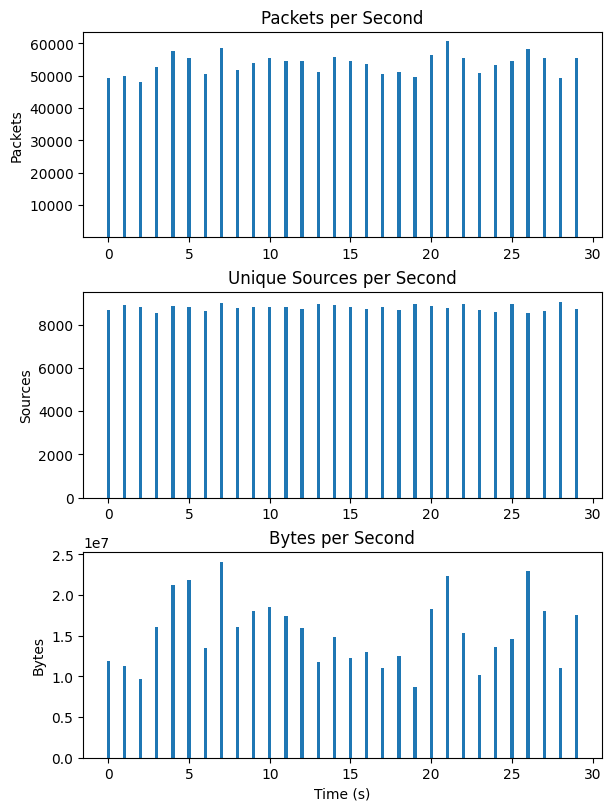

In [25]:
fig, axes = plt.subplots(nrows=3, figsize=(6, 8), layout='constrained')

axes[0].bar(aggregates.index, aggregates['packetTotalCount'], width=0.2, bottom=1)
axes[0].set_title("Packets per Second")
axes[0].set_ylabel("Packets")

axes[1].bar(aggregates.index, aggregates['distinct(sourceIPAddress)'], width=0.2)
axes[1].set_title("Unique Sources per Second")
axes[1].set_ylabel("Sources")

axes[2].bar(aggregates.index, aggregates['ipTotalLength'], width=0.2)
axes[2].set_title("Bytes per Second")
axes[2].set_ylabel("Bytes")
axes[2].set_xlabel("Time (s)")

plt.show()


In [77]:
import math

def returnStatistics(df):
    for col in df.columns:
        series = df[col]
        values = series.dropna().tolist()
        n = len(values)
        mean = sum(values) / n
        median = sorted(values)[n // 2] if n % 2 == 1 else (sorted(values)[n // 2 - 1] + sorted(values)[n // 2]) / 2
        
        # Population standard deviation (your formula)
        squared_diffs = [(x - mean) ** 2 for x in values]
        std = math.sqrt(sum(squared_diffs) / n)

        print(f"\nColumn: {col}")
        print(f"  Mean   : {mean:.1f}")
        print(f"  Median : {median:.1f}")
        print(f"  Std Dev: {std:.1f}")


In [78]:
returnStatistics(aggregates)


Column: packetTotalCount
  Mean   : 53640.7
  Median : 54282.5
  Std Dev: 3083.1

Column: distinct(sourceIPAddress)
  Mean   : 8813.5
  Median : 8830.0
  Std Dev: 134.0

Column: ipTotalLength
  Mean   : 15457954.6
  Median : 15083116.5
  Std Dev: 4141170.2
